# Hepatitis C Clustering

In [59]:
# Import libraries

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import setuptools.dist

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('./hcvdat0.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,615.0,308.000000,177.679487,1.00,154.500,308.00,461.500,615.00
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


<Axes: >

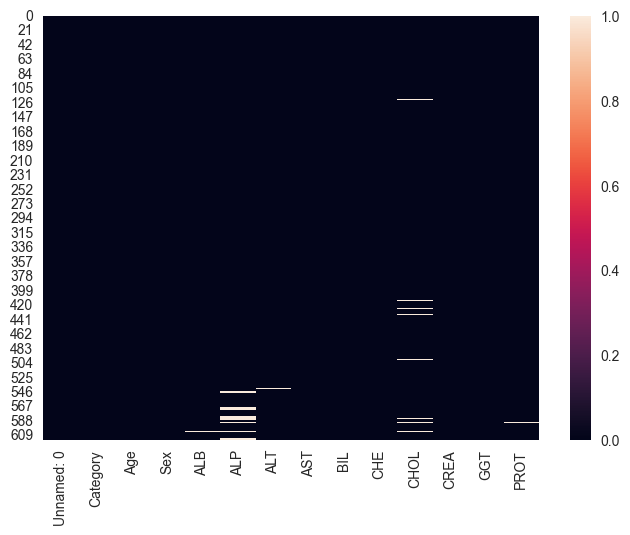

In [4]:
sns.heatmap(df.isnull())

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'ALB'}>,
        <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'BIL'}>],
       [<Axes: title={'center': 'CHE'}>,
        <Axes: title={'center': 'CHOL'}>,
        <Axes: title={'center': 'CREA'}>],
       [<Axes: title={'center': 'GGT'}>,
        <Axes: title={'center': 'PROT'}>, <Axes: >]], dtype=object)

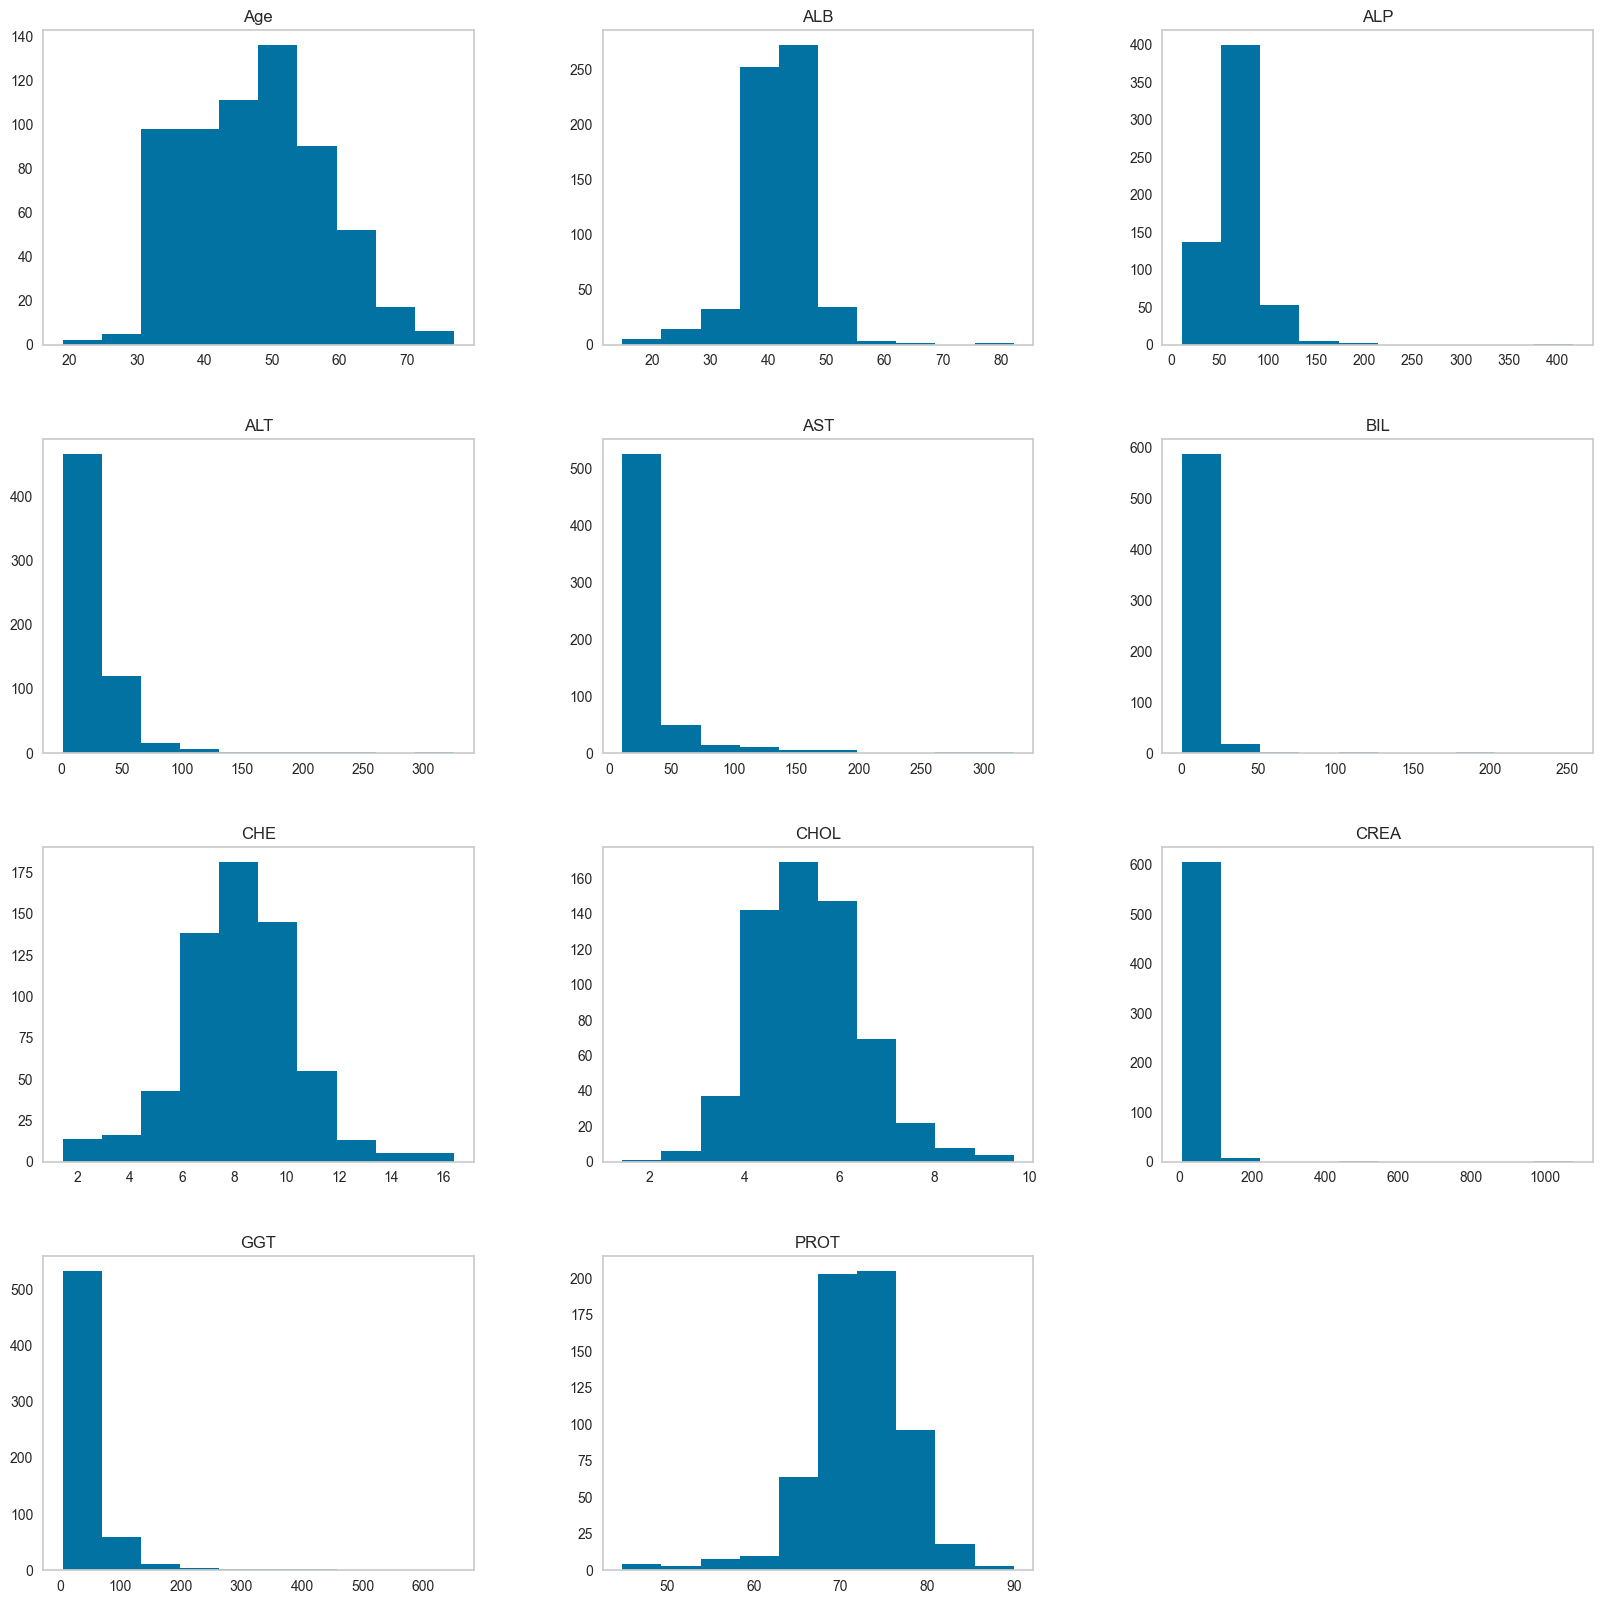

In [5]:
dfwoid = df.drop(columns=['Unnamed: 0'])
dfwoid.hist(figsize=(20,20), grid=False)

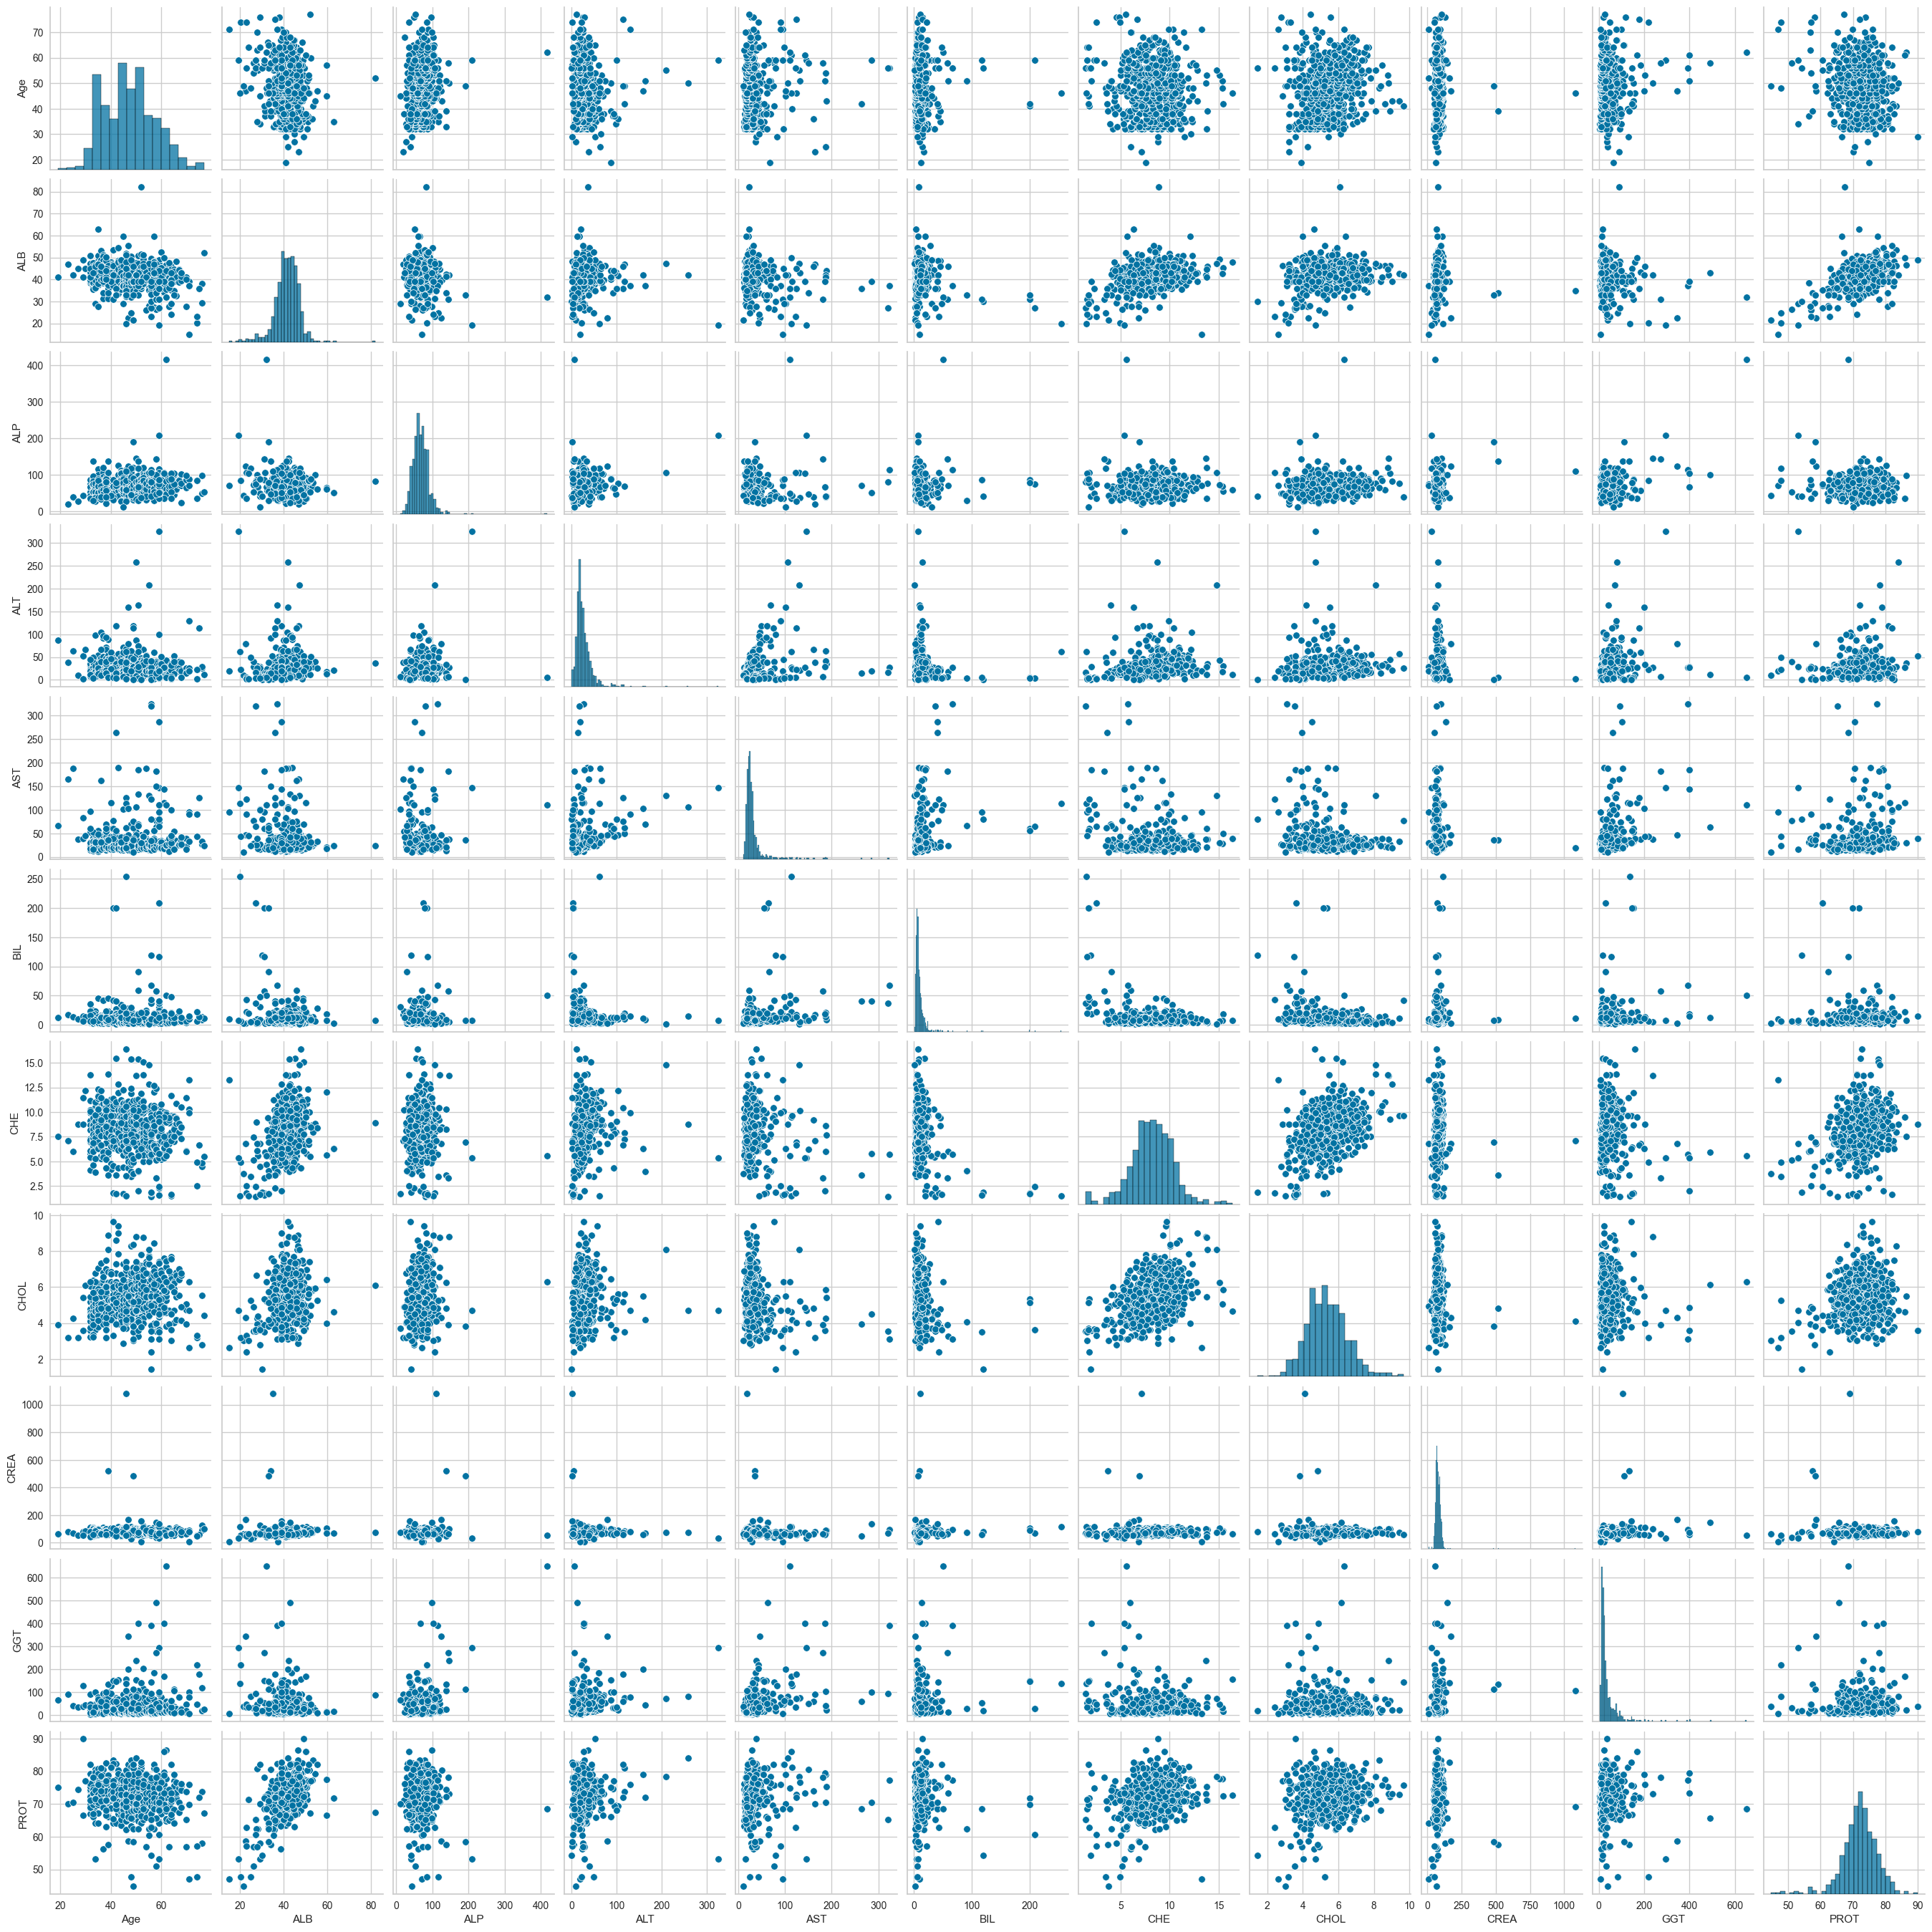

In [6]:
sns.pairplot(dfwoid)

In [7]:
dfwoid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [8]:
X = df.iloc[:,2:13]
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9
...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9
611,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9
612,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2
613,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0


In [9]:
X["Sex"] = X["Sex"].replace("m", 0)
X["Sex"] = X["Sex"].replace("f", 1)
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9
...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9
612,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2
613,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0


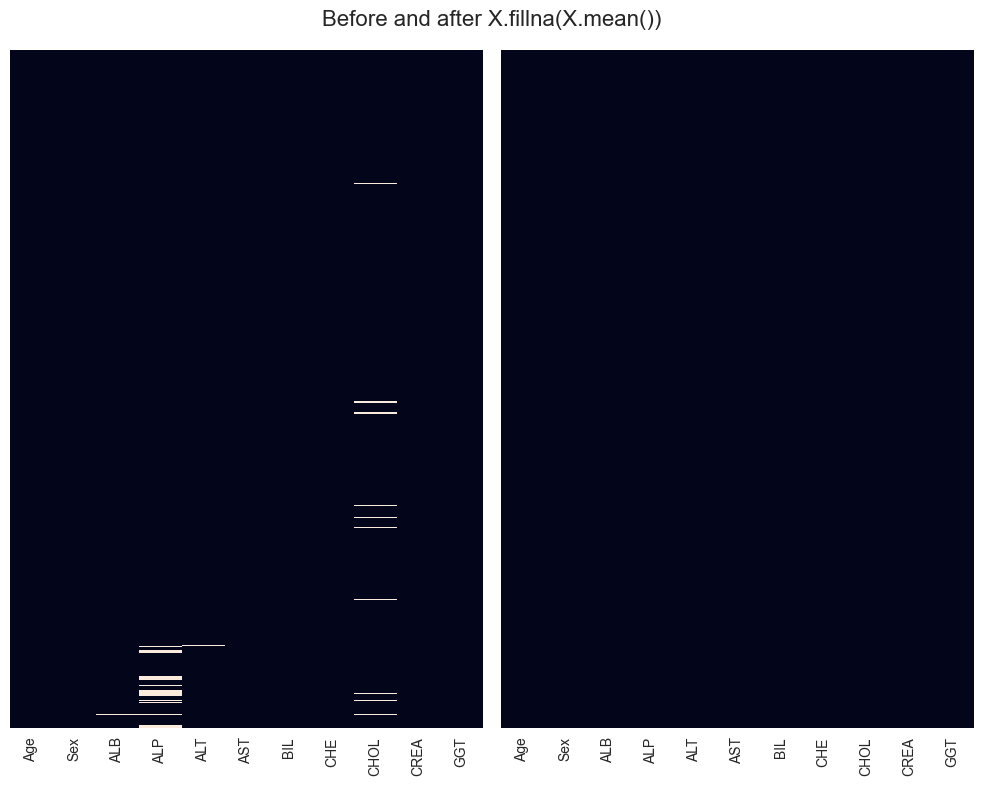

In [10]:
fig, ax  = plt.subplots(1, 2, sharex='col', figsize=(10, 8))
fig.suptitle('Before and after X.fillna(X.mean())', fontsize=16)
sns.heatmap(X.isna(), ax=ax[0], yticklabels=False, cbar=False)
sns.heatmap(X.fillna(X.mean()).isnull(), ax=ax[1],yticklabels=False, cbar=False)
fig.tight_layout()

X_ori = X.copy()
X = X.fillna(X.mean())

In [11]:
ss = StandardScaler()
X[:] = ss.fit_transform(X)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT
0,-1.533616,-0.794544,-0.540647,-0.616004,-0.816054,-0.383693,-0.198236,-0.574734,-1.904676,0.497070,-0.502286
1,-1.533616,-0.794544,-0.540647,0.078682,-0.410992,-0.305057,-0.381375,1.349161,-0.506078,-0.146590,-0.438203
2,-1.533616,-0.794544,0.914850,0.250402,0.304747,0.538767,-0.269457,0.291926,-0.149747,0.094783,-0.115957
3,-1.533616,-0.794544,0.273738,-0.635517,0.084520,-0.368571,0.381706,-0.393234,-0.559528,-0.025903,-0.104971
4,-1.533616,-0.794544,-0.419356,0.226986,0.163172,-0.302033,-0.091404,0.432588,-0.933675,-0.106361,-0.176378


In [12]:
pca = PCA()
pca.fit(X)
pca = PCA(np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.95)[0][0] +1)
reduced_data = pca.fit_transform(X)
pd.DataFrame(reduced_data, columns=[f'Component {i}' for i in range(reduced_data.shape[1])]).head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9
0,-0.030920,-1.780403,-1.673512,0.929423,-0.824788,-0.514856,-0.265910,-0.809731,-0.666977,-0.027417
1,-0.914013,0.064022,-1.017074,0.230556,-0.639708,0.069420,-0.809342,-0.811524,-1.377864,0.650891
2,-0.409513,0.644812,-1.588597,-0.011446,-0.763121,0.456912,0.140585,-0.309707,-0.153083,-0.151093
3,-0.241667,-0.609818,-1.660883,0.113065,-0.399032,0.419495,-0.477953,-0.358753,-0.001597,-0.505125
4,-0.165770,-0.144927,-1.234360,0.162784,-0.949042,-0.009129,-0.810028,-0.923242,-0.608342,0.237911


## Model 1: KMeans

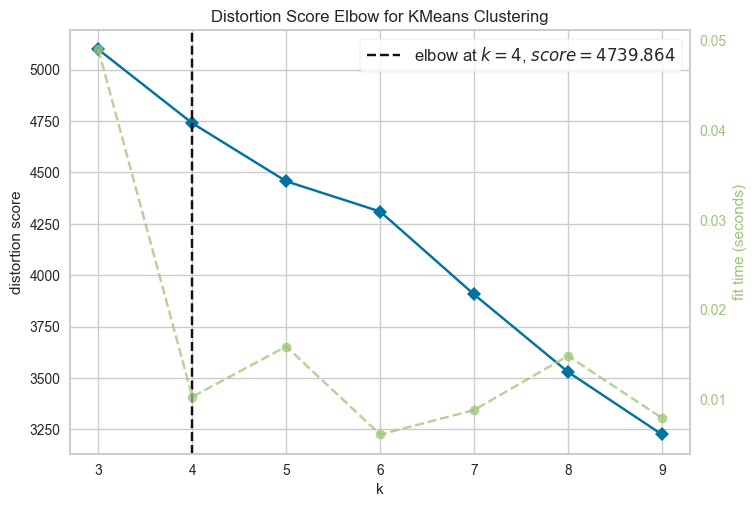

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans()
kmvis = KElbowVisualizer(model, k=(3,10))
kmvis.fit(X)
kmvis.poof()

Cluster
1    350
3    231
2     18
0     16
Name: count, dtype: int64


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT
Cluster,,,,,,,,,,,
0,53.0,0.0,36.5,124.00,53.5,80.0,10.0,6.470,4.72,76.5,189.00
1,46.0,0.0,43.4,66.35,26.5,27.5,7.8,8.745,5.33,84.0,25.25
2,56.0,0.0,31.0,73.80,5.3,106.0,53.0,1.940,3.63,73.8,64.90
3,48.0,1.0,40.3,63.20,18.3,22.4,6.0,7.750,5.32,68.0,17.60


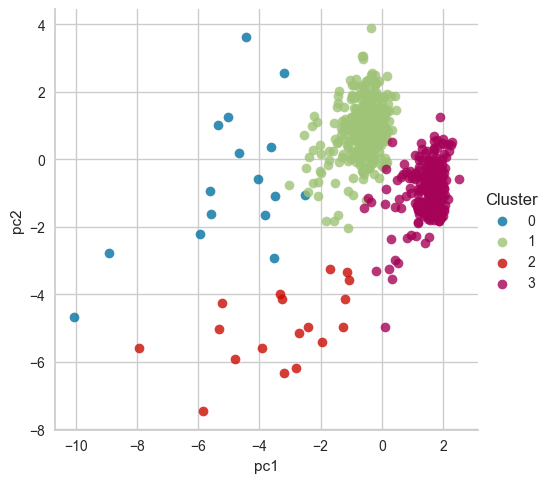

In [36]:
km = KMeans(n_clusters=4)
km = km.fit(X)
X['Cluster'] = km.predict(X)
X_ori['Cluster'] = X['Cluster']
print(X['Cluster'].value_counts())

pca = PCA()
pca_ft = pca.fit_transform(X)
pc = pd.DataFrame([pca_ft[:, 0], pca_ft[:, 1]]).T
pc.columns = ['pc1', 'pc2']
pc = pd.concat([pc, X['Cluster']], axis=1)
sns.lmplot(x='pc1', y='pc2', data=pc, hue='Cluster', fit_reg=False)
X_ori.groupby('Cluster').median()

In [37]:
km_score = silhouette_score(X, X['Cluster'])
print(km_score)

0.2844991167411054


## Model 2: DBSCAN

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT
Cluster,,,,,,,,,,,
-1,51.0,0.0,39.0,68.55,25.3,76.1,13.0,6.03,4.345,71.85,76.7
0,46.0,0.0,43.4,66.70,26.3,27.2,7.7,8.78,5.365,84.00,24.2
1,48.0,1.0,40.3,63.80,18.3,22.2,6.0,7.84,5.380,68.00,17.1


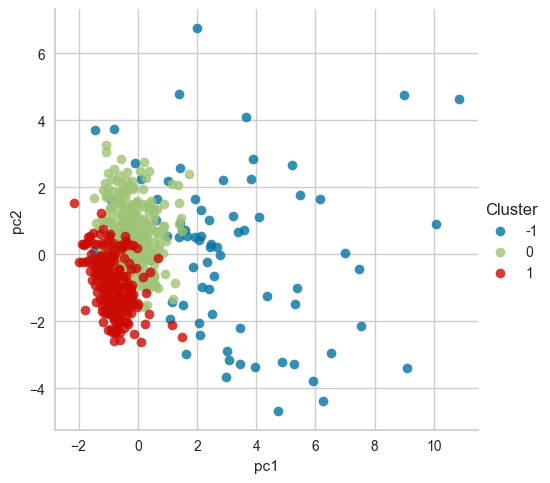

In [57]:
X.drop(columns=['Cluster'])
X_ori.drop(columns=['Cluster'])

db = DBSCAN(eps=2)
db.fit(X)
X['Cluster'] = db.labels_
X_ori['Cluster'] = X['Cluster']
X['Cluster'].value_counts()

pca = PCA()
pca_ft = pca.fit_transform(X)
pc = pd.DataFrame([pca_ft[:, 0], pca_ft[:, 1]]).T
pc.columns = ['pc1', 'pc2']
pc = pd.concat([pc, X['Cluster']], axis=1)
sns.lmplot(x='pc1', y='pc2', data=pc, hue='Cluster', fit_reg=False)
X_ori.groupby('Cluster').median()

In [56]:
db_score = silhouette_score(X, X['Cluster'])
print(db_score)

0.20184786188358284


## Model 3: GMM

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT
Cluster,,,,,,,,,,,
0,46.0,0.0,43.40,66.70,26.3,27.2,7.7,8.780,5.365,84.00,24.20
1,45.0,1.0,40.50,60.55,18.6,22.1,9.1,7.300,4.910,64.00,18.60
2,51.0,0.0,39.00,68.55,25.3,76.1,13.0,6.030,4.345,71.85,76.70
3,48.0,1.0,40.25,66.10,18.3,22.2,5.5,8.025,5.580,69.00,16.45


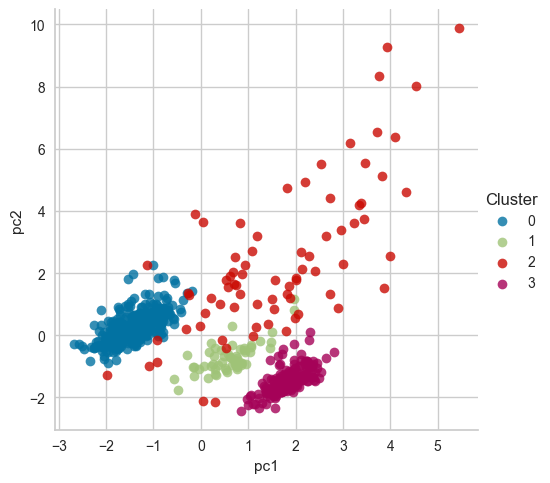

In [60]:
X.drop(columns=['Cluster'])
X_ori.drop(columns=['Cluster'])

gm = GaussianMixture(n_components=4)
gm.fit(X)
X['Cluster'] = gm.fit_predict(X)
X_ori['Cluster'] = X['Cluster']
X['Cluster'].value_counts()

pca = PCA()
pca_ft = pca.fit_transform(X)
pc = pd.DataFrame([pca_ft[:, 0], pca_ft[:, 1]]).T
pc.columns = ['pc1', 'pc2']
pc = pd.concat([pc, X['Cluster']], axis=1)
sns.lmplot(x='pc1', y='pc2', data=pc, hue='Cluster', fit_reg=False)
X_ori.groupby('Cluster').median()

In [61]:
gm_score = silhouette_score(X, X['Cluster'])
print(gm_score)

0.18863418607701526


### Results

In [62]:
print(f'KMeans model silhouette_score: {km_score}')
print(f'DBSCAN model silhouette_score: {db_score}')
print(f'GMM model silhouette_score: {gm_score}')

KMeans model silhouette_score: 0.2844991167411054
DBSCAN model silhouette_score: 0.20184786188358284
GMM model silhouette_score: 0.18863418607701526
